*This Notebook was created by Antoine Palisson*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

This exercise focus on the preprocessing steps of **Categorical variables**.

Only a fraction of the methods will be used in this Notebook, including:

* Random & Stratified Splitting on a numerical target
* Missing Data deletion & imputation
* Outliers detection
* Encoding the categories in 4 different ways

Depending on the dataset, it may be interesting to use other methods seen in the lesson.

# Splitting, Missing & Outliers

**<font color='blue'>1. Load the modified cat in the dat dataset (`cat_in_the_dat_m.csv`) and show its content.**

In [ ]:
cat = pd.read_csv('/content/drive/MyDrive/Cours/Machine Learning/Exercices/0_Datasets/cat_in_the_dat_m.csv')
cat.head()

,cat_1,cat_2,cat_3,cat_4,day,month,target
0,0.0,Red,Trapezoid,Big,6.0,3.0,-0.343563
1,1.0,Red,Star,Big,7.0,7.0,-2.015235
2,0.0,Red,NaN,Big,5.0,9.0,4.260065
3,NaN,Red,Circle,Small,3.0,3.0,3.463973
4,0.0,Red,Triangle,Big,5.0,12.0,-3.730371


The `.info()` method can be used on a dataframe to get a resume of its variables, length and missing values. This method has some parameters such as the **show_counts** parameter that can be either True or False, if True the method returns the number of non-missing values in the dataset.

**<font color='blue'>2. Show a resume of the dataset variables, length and missing values.<br>Is there any missing variable ?**

In [ ]:
# All the columns excepted the target have missing values
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cat_1   48504 non-null  float64
 1   cat_2   48431 non-null  object 
 2   cat_3   48476 non-null  object 
 3   cat_4   48469 non-null  object 
 4   day     48463 non-null  float64
 5   month   48543 non-null  float64
 6   target  50000 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.7+ MB


**<font color='blue'>3. What are the categorical type (nominal, ordinal or cyclical) of the features ?**

In [ ]:
# Probably nominal
cat['cat_1'].value_counts()

0.0    43999
1.0     4505
Name: cat_1, dtype: int64

In [ ]:
# Colors --> No order --> Nominal
cat['cat_2'].value_counts()

Red      26969
Blue     17129
Green     4333
Name: cat_2, dtype: int64

In [ ]:
# Shapes --> No order --> Nominal
cat['cat_3'].value_counts()

Triangle     13623
Polygon      12668
Trapezoid     9968
Circle        8643
Square        2186
Star          1170
Heart          168
Diamond         50
Name: cat_3, dtype: int64

In [ ]:
# Sizes --> Ordered --> Ordinal
cat['cat_4'].value_counts()

Small      18909
Big        16488
Average    13072
Name: cat_4, dtype: int64

In [ ]:
# Day & month --> Cyclical
cat['day'].value_counts()

3.0    9568
5.0    9202
6.0    8043
7.0    7107
1.0    7094
2.0    5496
4.0    1953
Name: day, dtype: int64

**<font color='blue'>4. What is the type of the target ?**

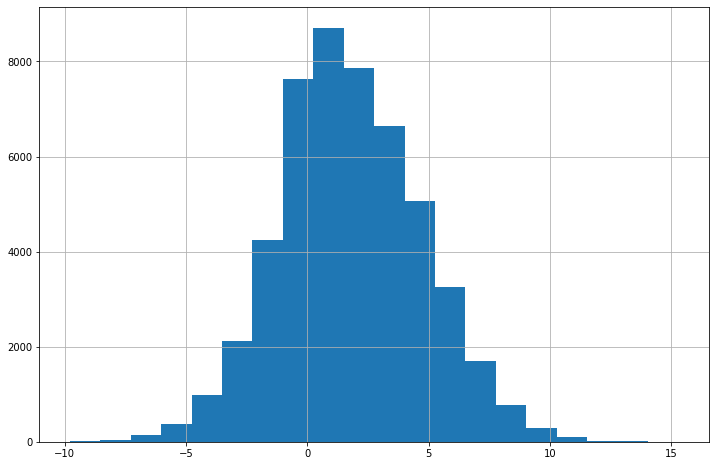

In [ ]:
# It is a numerical target
cat['target'].hist(bins=20, figsize=(12,8))
plt.show()

## Splitting

**<font color='blue'>1. Split the cat in the data dataset into 3 sets using the `train_test_split` function:**


*   **<font color='blue'>Training (80% of the data)**
*   **<font color='blue'>Validation (10% of the data)**
*   **<font color='blue'>Testing (10% of the data)**

In [ ]:
from sklearn.model_selection import train_test_split
cat_train, cat_test = train_test_split(cat, test_size=0.1, random_state=42)
cat_train, cat_val = train_test_split(cat_train, test_size=0.1/(1-0.1), random_state=42)

In [ ]:
print(f'Training shape   : {cat_train.shape} - {len(cat_train)/50000:.0%}')
print(f'Validation shape : {cat_val.shape} - {len(cat_val)/50000:.0%}')
print(f'Testing shape    : {cat_test.shape} - {len(cat_test)/50000:.0%}')

Training shape   : (40000, 7) - 80%
Validation shape : (5000, 7) - 10%
Testing shape    : (5000, 7) - 10%


**<font color='blue'>2. Display the distribution of the training, the validation and the testing set.<br> Are they identical  ?**

*Tips: You can use the `plot.kde()` or `plot.hist()`.*

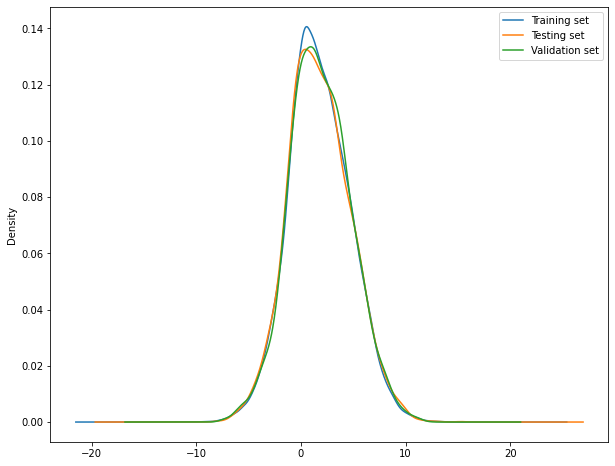

In [ ]:
# They are almost identical
fig, ax = plt.subplots(1,1,figsize=(10,8))

cat_train['target'].plot.kde(ax=ax, label='Training set')
cat_test['target'].plot.kde(ax=ax, label='Testing set')
cat_val['target'].plot.kde(ax=ax, label='Validation set')

plt.legend()
plt.show()

The stratify parameter of the `train_test_split` function is typically used when you have a categorical target variable and you want to ensure that the same proportion of each category is represented in both the training and test sets. However, if you have a regression target variable, the stratify parameter is not directly applicable.

In order to use the stratify parameter, it is possible to bin the numerical target variable into a categorical variable.

**<font color='blue'>3.a. Transform the numerical target into a categorical target using a binning method.**

*Tips: You can use `pd.cut()` or `pd.qcut()`*

In [ ]:
binned_target = pd.qcut(cat['target'], q=10)
binned_target.value_counts()

(-9.795, -1.765]    5000
(-1.765, -0.618]    5000
(-0.618, 0.167]     5000
(0.167, 0.878]      5000
(0.878, 1.616]      5000
(1.616, 2.418]      5000
(2.418, 3.273]      5000
(3.273, 4.286]      5000
(4.286, 5.663]      5000
(5.663, 15.308]     5000
Name: target, dtype: int64

**<font color='blue'>3.b. Set the `stratify` parameter of the `train_test_split` function to the binned target column and re-create the training, validation and testing sets.**

In [ ]:
# The binned_target is passed to the train_test_split function 
# because the binned_target of the training set will be use to generate the validation set

cat_train, cat_test, bin_train, bin_test = train_test_split(cat, 
                                                            binned_target,
                                                            test_size=0.1, 
                                                            random_state=42, 
                                                            stratify=binned_target)

cat_train, cat_val = train_test_split(cat_train, 
                                      test_size=0.1/(1-0.1), 
                                      random_state=42, 
                                      stratify=bin_train)

**<font color='blue'>4. Display the distribution of the training, the validation and the testing set.<br> Are they identical  ?**

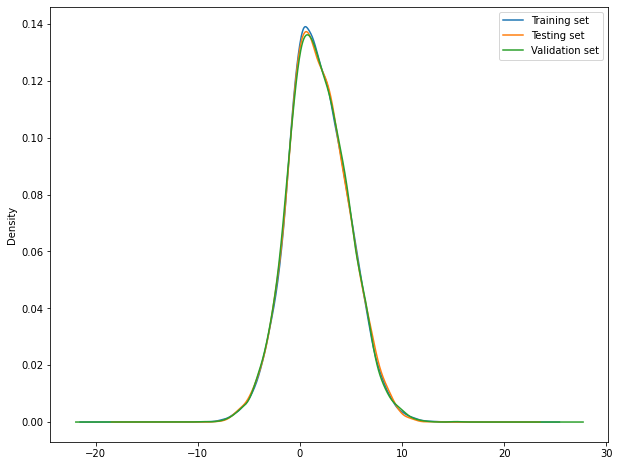

In [ ]:
# The distributions are much more alike
fig, ax = plt.subplots(1,1,figsize=(10,8))

cat_train['target'].plot.kde(ax=ax, label='Training set')
cat_test['target'].plot.kde(ax=ax, label='Testing set')
cat_val['target'].plot.kde(ax=ax, label='Validation set')

plt.legend()
plt.show()

**<font color='blue'>5. Separate the features from the target for the training, the validation and the testing sets.**

In [ ]:
X_train = cat_train.copy()
y_train = X_train.pop('target')

X_val = cat_val.copy()
y_val = X_val.pop('target')

X_test = cat_test.copy()
y_test = X_test.pop('target')

## Missing data

The missing values can be found in a dataframe using the `.isna()` method.

**<font color='blue'>1. Count the number of NaN in the feature of the training cat in the dat dataframe.**

*Tips: You can use the `.isna()` method and the `.sum()` method.*

In [ ]:
X_train.isna().sum()

cat_1    1222
cat_2    1268
cat_3    1219
cat_4    1233
day      1216
month    1169
dtype: int64

**<font color='blue'>2. Drop the missing values of the training set.<br>How many rows were removed ?**

In [ ]:
# 6811 rows were removed .. about 17% of the dataset ! 
X_train.dropna()

,cat_1,cat_2,cat_3,cat_4,day,month
38273,0.0,Red,Polygon,Big,3.0,1.0
38766,0.0,Blue,Circle,Small,6.0,8.0
35646,0.0,Blue,Polygon,Big,7.0,7.0
30536,0.0,Red,Triangle,Big,4.0,8.0
8541,0.0,Blue,Polygon,Small,1.0,9.0
...,...,...,...,...,...,...
4766,0.0,Red,Polygon,Big,5.0,1.0
43399,0.0,Red,Triangle,Small,6.0,3.0
15366,1.0,Blue,Polygon,Small,3.0,12.0
5868,0.0,Blue,Trapezoid,Small,5.0,11.0


**<font color='blue'>3.a. Replace the missing values of the training set by their mode using the `SimpleImputer` from sklearn.<br>3.b. Get the mode values for each columns using the `statistics_` attribute.**

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
X_train_no_nan = imp.fit_transform(X_train)

In [ ]:
# The output of the SimpleImputer is a numpy array
# You can convert it back to a dataframe using the following syntax
X_train_no_nan = pd.DataFrame(X_train_no_nan,
                              columns=X_train.columns)
X_train_no_nan.head()

,cat_1,cat_2,cat_3,cat_4,day,month
0,0.0,Red,Polygon,Big,3.0,1.0
1,0.0,Red,Triangle,Small,5.0,2.0
2,0.0,Blue,Circle,Small,6.0,8.0
3,0.0,Blue,Trapezoid,Big,6.0,8.0
4,0.0,Blue,Polygon,Big,7.0,7.0


In [ ]:
# All the missing values have been replaced by the median !
X_train_no_nan.isna().sum()

cat_1    0
cat_2    0
cat_3    0
cat_4    0
day      0
month    0
dtype: int64

In [ ]:
for col, stat in zip(X_train_no_nan.columns, imp.statistics_):
    print(f"{col:5} - Mode = {stat}")

cat_1 - Mode = 0.0
cat_2 - Mode = Red
cat_3 - Mode = Triangle
cat_4 - Mode = Small
day   - Mode = 3.0
month - Mode = 8.0


**<font color='blue'>4. Apply the missing values imputation to the validation and the testing sets.**

*Tips: You must reuse the computations made on the training set (e.g. the median should not be calculated on the validation and the testing sets)*

In [ ]:
# .transform() NOT .fit()
X_val_no_nan = imp.transform(X_val)
X_test_no_nan = imp.transform(X_test)

In [ ]:
# No more missing values
X_test_no_nan = pd.DataFrame(X_test_no_nan,
                             columns=X_val.columns)
X_test_no_nan.isna().sum()

cat_1    0
cat_2    0
cat_3    0
cat_4    0
day      0
month    0
dtype: int64

In [ ]:
# No more missing values
X_val_no_nan = pd.DataFrame(X_val_no_nan,
                            columns=X_val.columns)
X_val_no_nan.isna().sum()

cat_1    0
cat_2    0
cat_3    0
cat_4    0
day      0
month    0
dtype: int64

## Outliers

In the following exercise, we will use the imputed feature training set.

**<font color='blue'>1. Which categorical feature contain outliers ?**

*Tips: Categorical outliers can be seen as "rare" category.*

In [ ]:
# The cat_3 feature contains two outliers : Heart & Diamond.
X_train_no_nan['cat_3'].value_counts()

Triangle     12116
Polygon      10089
Trapezoid     8012
Circle        6923
Square        1756
Star           921
Heart          142
Diamond         41
Name: cat_3, dtype: int64

**<font color='blue'>2. Merge the outliers into one "rare" category.**

In [ ]:
X_train_no_nan['cat_3'] = X_train_no_nan['cat_3'].replace({'Heart':'Rare',
                                                           'Diamond':'Rare'})
X_train_no_nan['cat_3'].value_counts()

Triangle     12116
Polygon      10089
Trapezoid     8012
Circle        6923
Square        1756
Star           921
Rare           183
Name: cat_3, dtype: int64

**<font color='blue'>3. Apply the outlier transformation to the validation and the testing sets.**

In [ ]:
X_test_no_nan['cat_3'] = X_test_no_nan['cat_3'].replace({'Heart':'Rare',
                                                         'Diamond':'Rare'})
X_val_no_nan['cat_3'] = X_val_no_nan['cat_3'].replace({'Heart':'Rare',
                                                       'Diamond':'Rare'})

# Transformation

**In the following exercise, we will use the cleaned cat in the dat training dataset <br>*i.e. the dataset without any missing values and outliers obtained at the previous exercise.***

## Ordinal Encoding

Ordinal encoding is a technique for encoding categorical features as numerical values in a way that preserves the order or ranking of the categories.

The scikit-learn library provides a convenient OrdinalEncoder class for performing ordinal encoding on categorical features. The OrdinalEncoder class takes a list of categorical features as input and returns a numerical array with the same shape as the input, where each categorical value is replaced with a numerical value based on its order or ranking.

Here are some of the most useful parameters:

* **`categories`**: This parameter can be used to explicitly specify the categories for each feature. It should be a list of lists, where each inner list contains the categories for the corresponding feature. If this parameter is not provided, the encoder will automatically infer the categories from the input data.

* **`handle_unknown`**: This parameter specifies how to handle unknown categories that are encountered during the transformation. It can be set to error to raise an error or use_encoded_value to assign the value -1 to unknown categories.

* **`unknown_value`**: This parameter specifies the value to assign to unknown categories if handle_unknown is set to value. By default, it is set to None, which means that the encoder will raise an error if it encounters unknown categories.

Ordinal Encoder can be used as follows:

```
encoder = OrdinalEncoder(...)
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
```

**<font color='blue'>1. Apply the Ordinal Encoding to the ordinal feature(s) of the dataset.**

*Tips: Specify the feature categories in the correct order in the categories parameter*

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# 'Small' < 'Average'< 'Big' 
ord = OrdinalEncoder(categories=[['Small','Average','Big']],
                     handle_unknown='use_encoded_value',
                     unknown_value=-1)

ord.fit(X_train_no_nan[['cat_4']])
ordinal_ord = ord.transform(X_train_no_nan[['cat_4']])
ordinal_ord

array([[2.],
       [0.],
       [0.],
       ...,
       [2.],
       [0.],
       [0.]])

Standardizing the output of ordinal encoding is generally not necessary if the feature is already ordinal. <br>However, **if the ordinal feature has a large range or if its values have a large variance, it may be beneficial to standardize the output of ordinal encoding.**

As always in Machine Learning, there is no free meal.<br> Thus, it is appropriate to try different preprocessing.

**<font color='blue'>2. Just for the example, scale the output of the ordinal encoding.**

*Tips: You can using z-score scaling, min-max scaling, absolute max scaling ...*

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
ordinal_ord = std.fit_transform(ordinal_ord)

In [ ]:
ordinal_ord = pd.DataFrame(ordinal_ord,
                           columns=['cat_4_enc'])
ordinal_ord.head()

,cat_4_enc
0,1.261352
1,-1.075405
2,-1.075405
3,1.261352
4,1.261352


**<font color='blue'>3. Apply the Ordinal Encoding and the scaling on the ordinal feature(s) of the test set and the validation set.**

In [ ]:
ordinal_val = ord.transform(X_val_no_nan[['cat_4']])
ordinal_val = std.transform(ordinal_val)
ordinal_test = ord.transform(X_test_no_nan[['cat_4']])
ordinal_test = std.transform(ordinal_test)

## One Hot Encoding

**One Hot encoding** is a technique for encoding categorical features as binary vectors in a way that enables machine learning algorithms to treat each category as a separate feature.

The scikit-learn library provides a convenient OneHotEncoder class for performing One Hot encoding on categorical features. The OneHotEncoder class takes a list of categorical features as input and returns a sparse matrix with the same number of rows as the input, where each row is a binary vector representing the presence or absence of each category.

Here are some of the most useful parameters:

* **`categories`**: This parameter can be used to explicitly specify the categories for each feature. It should be a list of lists, where each inner list contains the categories for the corresponding feature. If this parameter is not provided, the encoder will automatically infer the categories from the input data.

* **`drop`**: This parameter specifies whether to drop one of the categories for each feature to avoid collinearity. By default, it is set to None, which means that all categories are kept. If it is set to `first`, the first category in each feature will be dropped, and if it is set to `if_binary`, it drops the first category in each feature with two categories.

* **`handle_unknown`**: This parameter specifies how to handle unknown categories that are encountered during the transformation. It can be set to `error` to raise an error, `ignore` to assign a row of all zeros to unknown categories, or `infrequent_if_exist` to assign a specified value to unknown categories.

*  **`sparse_output`**: This parameter specifies whether to return a sparse matrix or a dense array. By default, it is set to True, which means that a sparse matrix is returned.

One Hot Encoder can be used as follows:

```
encoder = OneHotEncoder(...)
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
```

**<font color='blue'>1. Apply the One Hot Encoding to the nominal feature(s) of the dataset.**

*Tips: Don't forget to use `sparse_output=False` to return a Numpy array.*

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(handle_unknown='ignore',
                       sparse_output=False)
nominal_onehot = onehot.fit_transform(X_train_no_nan[['cat_2', 'cat_3']])
nominal_onehot

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

The output of the `OneHotEncoder` is a Numpy array (*if `sparse_output=False`*) without the name of the columns.

Fortunately, `OneHotEncoder` provides the `get_feature_names_out()` function that can be used to retrieve the names of the features in the encoded output array.

```
feature_names = encoder.get_feature_names_out()
```

**<font color='blue'>2.a. Get the names of the One Hot features.<br>2.b. Create a dataframe with the one hot encoded features and their names.**

*Tips: You can transform all the features simultaneously if you are using a Pandas dataframe or a Numpy array.*

In [ ]:
feature_names = onehot.get_feature_names_out()
nominal_onehot = pd.DataFrame(nominal_onehot,
                              columns=feature_names)
nominal_onehot

,cat_2_Blue,cat_2_Green,cat_2_Red,cat_3_Circle,cat_3_Polygon,cat_3_Rare,cat_3_Square,cat_3_Star,cat_3_Trapezoid,cat_3_Triangle
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**<font color='blue'>3. Apply the One Hot Encoding on the nominal features of the test set and the validation set.**

In [ ]:
nominal_onehot_val = onehot.transform(X_val_no_nan[['cat_2', 'cat_3']])
nominal_onehot_test = onehot.transform(X_test_no_nan[['cat_2', 'cat_3']])

## Cyclical Encoding

Cyclical categories can be encoded using the **sine and cosine functions**.

**<font color='blue'>1.a. Calculate $sin(2\pi X/n)$ on the cyclical features with X the feature and n the period.**

In [ ]:
sin_day = X_train_no_nan['day'].apply(lambda x:np.sin(2*np.pi*x/7))
sin_day.name = 'Sin day'

sin_mth = X_train_no_nan['month'].apply(lambda x:np.sin(2*np.pi*x/12))
sin_mth.name = 'Sin month'

**<font color='blue'>1.b. Do the same with $cos(2\pi X/n)$.**

In [ ]:
cos_day = X_train_no_nan['day'].apply(lambda x:np.cos(2*np.pi*x/7))
cos_day.name = 'Cos day'

cos_mth = X_train_no_nan['month'].apply(lambda x:np.cos(2*np.pi*x/12))
cos_mth.name = 'Cos month'

**<font color='blue'>2. Display the cosine and the sine values on a scatter plot.**

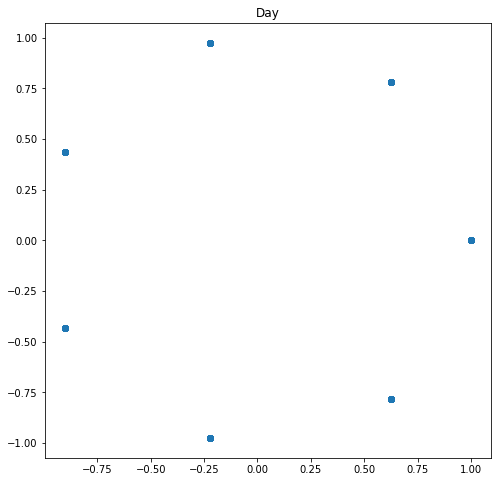

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(cos_day, sin_day)
plt.title('Day')
plt.show()

## Putting together

If the preprocessing steps are done separately, it is generally appropriate to concatenate them back into one unique dataset.

It may be useful to use Pipelines such as the ColumnTransformer [from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer).

**<font color='blue'>Concatenate all the encoded features back into one dataset.**

In [ ]:
# Don't forget the binary cat_1 that we didn't modify
X_train_p = pd.concat([X_train['cat_1'],
                       nominal_onehot,
                       ordinal_ord,
                       sin_day,
                       cos_day,
                       sin_mth,
                       cos_mth], axis=1)
X_train_p.head()

,cat_1,cat_2_Blue,cat_2_Green,cat_2_Red,cat_3_Circle,cat_3_Polygon,cat_3_Rare,cat_3_Square,cat_3_Star,cat_3_Trapezoid,cat_3_Triangle,cat_4_enc,Sin day,Cos day,Sin month,Cos month
38273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.075405,-9.749279e-01,-0.222521,-8.660254e-01,-5.000000e-01
17099,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.092974,-9.749279e-01,-0.222521,1.000000e+00,6.123234e-17
38766,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.261352,-2.449294e-16,1.000000,-8.660254e-01,-5.000000e-01
9070,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092974,4.338837e-01,-0.900969,-8.660254e-01,-5.000000e-01
35646,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.075405,-9.749279e-01,-0.222521,-2.449294e-16,1.000000e+00
